# Predicting fuel consumption in miles per gallon

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns
city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and
4 continuous variables.

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from scipy.stats import zscore

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


### Exploratory data analysis

In [3]:
print("The data frame has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The data frame has 398 rows and 8 columns


In [4]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

There is no null values, since <b>hp</b> column is object type, we check for unique value to see any non-numeric values

In [6]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There is a <b>?</b> in the data, lets fix with mean value

In [7]:
df.hp = df.hp.apply(lambda x: np.nan if x is "?" else x)
df.hp = df.hp.astype("float32")
df.hp.fillna(df.hp.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float32(1), float64(3), int64(3), object(1)
memory usage: 23.4+ KB


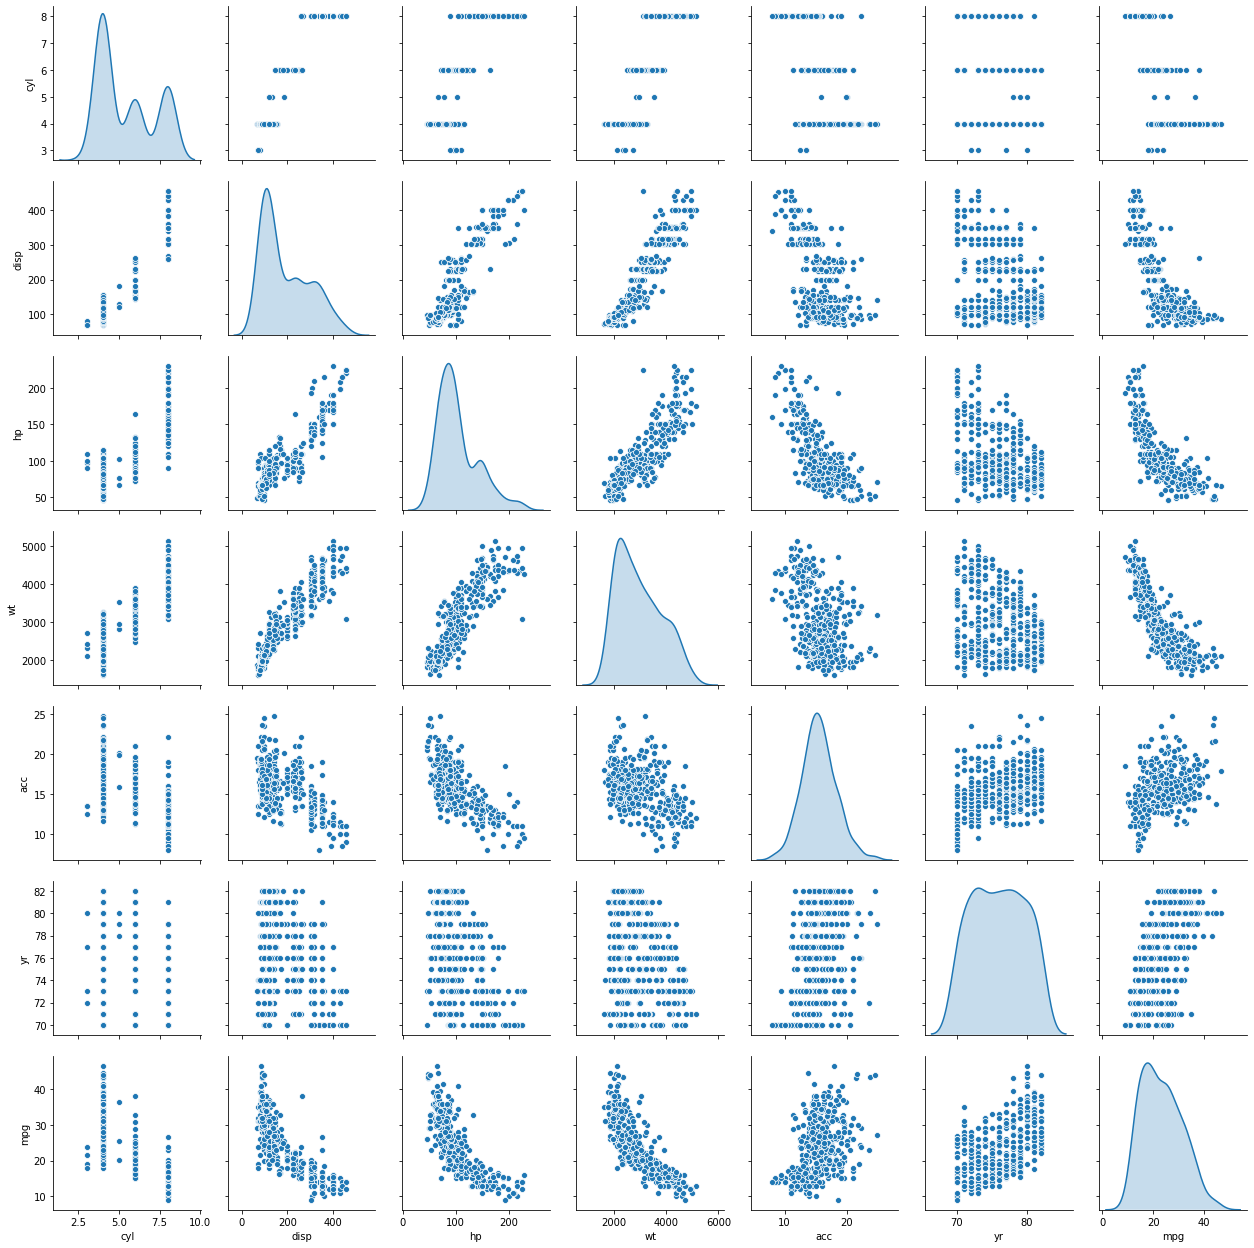

In [8]:
# checking the pair plot for numerical columns
sns.pairplot(df.drop(['car name'], axis=1),diag_kind='kde')
plt.show()

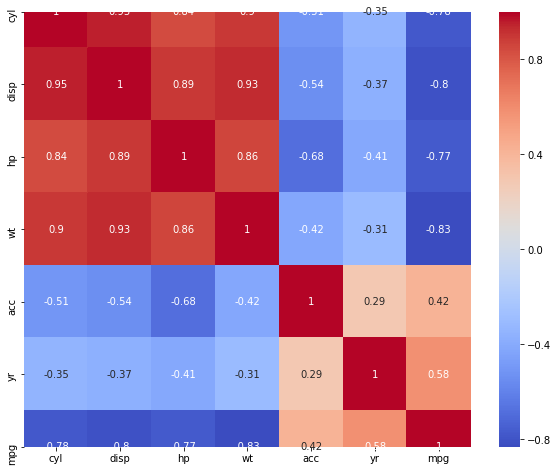

In [9]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

### Next will be performing the statistical test to find the significance of variable so that we can reduce no.of variable

In [10]:
test1=smf.ols('mpg~cyl+disp+hp+wt+acc',df).fit()

In [11]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):          1.40e-101
Time:                        20:01:05   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2291.
Df Residuals:                     392   BIC:                             2315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8650      2.635     17.405      0.000      40.684      51.046
cyl           -0.3587      0.410     -0.875      0.382      -1.165       0.447
disp          -0.0014      0.009     -0.153      0.879      -0.019       0.017
hp            -0.0390      0.016     -2.422      0.016      -0.071      -0.007
wt            -0.0054      0.001     -6.654      0.000      -0.007      -0.004
acc           -0.0070      0.123     -0.057      0.955      -0.248       0.234
==============================================================================
Omnibus:                       38.520   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.729
Skew:                           0.708   Prob(JB):                     5.85e-12
Kurtosis:                       4.057   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inference as in the above summary the p value of the acc, disp are greater than 0.5 so we can remove the acc and disp variables from the dataset

In [12]:
df=df.drop(['acc','disp'],axis=1)
df.head()

,car name,cyl,hp,wt,yr,mpg
0,chevrolet chevelle malibu,8,130.0,3504,70,18.0
1,buick skylark 320,8,165.0,3693,70,15.0
2,plymouth satellite,8,150.0,3436,70,18.0
3,amc rebel sst,8,150.0,3433,70,16.0
4,ford torino,8,140.0,3449,70,17.0


In [13]:
# removing the car name variable as it has nothing to to here
car_df=df.drop('car name',axis=1)
car_df.head()

,cyl,hp,wt,yr,mpg
0,8,130.0,3504,70,18.0
1,8,165.0,3693,70,15.0
2,8,150.0,3436,70,18.0
3,8,150.0,3433,70,16.0
4,8,140.0,3449,70,17.0


In [14]:
car_df = car_df.apply(zscore)
car_df.head()

,cyl,hp,wt,yr,mpg
0,1.498191,0.669196,0.630870,-1.627426,-0.706439
1,1.498191,1.586599,0.854333,-1.627426,-1.090751
2,1.498191,1.193427,0.550470,-1.627426,-0.706439
3,1.498191,1.193427,0.546923,-1.627426,-0.962647
4,1.498191,0.931312,0.565841,-1.627426,-0.834543


In [15]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(car_df)
    distortions.append(
        sum(np.min(cdist(car_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / car_df.shape[0])

In [16]:
cdist(car_df,kmeanModel.cluster_centers_,'euclidean')

array([[4.91570243, 1.24802035, 3.97413428, ..., 4.02764288, 3.1320069 ,
        2.1019576 ],
       [5.53305599, 0.88022403, 4.66026276, ..., 4.52576941, 3.76123924,
        2.11431128],
       [5.08177777, 1.14577212, 4.18191012, ..., 4.17735174, 3.32692514,
        2.1006742 ],
       ...,
       [0.80258725, 5.04564035, 1.79241677, ..., 0.99782079, 2.78160308,
        4.10729562],
       [1.30887309, 4.72761825, 1.86308712, ..., 0.64694085, 2.66307575,
        3.76852444],
       [1.10863492, 4.81359147, 1.91432945, ..., 0.79746061, 2.77092212,
        3.85663802]])

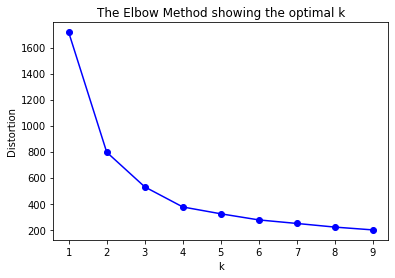

In [17]:
# Plot the elbow
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
# Build kmeans clustering model using k=4

kmeans = KMeans(n_clusters=4)

In [19]:
kmeans.fit(car_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
labels = kmeans.predict(car_df)
centroids = kmeans.cluster_centers_

In [21]:
print(centroids)

[[-0.82534015 -0.73521724 -0.76856959  1.10179281  1.18017325]
 [ 1.49819126  1.58538033  1.46620996 -0.7930333  -1.199639  ]
 [ 0.47710194  0.03623356  0.38939412  0.13543373 -0.51951147]
 [-0.81511661 -0.56078706 -0.76637748 -0.70676021  0.19541328]]


In [22]:
centroids_df = pd.DataFrame(centroids, columns = car_df.columns)
centroids_df

,cyl,hp,wt,yr,mpg
0,-0.825340,-0.735217,-0.768570,1.101793,1.180173
1,1.498191,1.585380,1.466210,-0.793033,-1.199639
2,0.477102,0.036234,0.389394,0.135434,-0.519511
3,-0.815117,-0.560787,-0.766377,-0.706760,0.195413


In [23]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 2, 2, 3, 0, 3, 3, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 3,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 2,
       3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,

In [24]:
prediction = kmeans.predict(car_df)
df_car_pred = pd.DataFrame(car_df)

In [25]:
df_car_pred['cluster'] = prediction
df_car_pred.head(10)

,cyl,hp,wt,yr,mpg,cluster
0,1.498191,0.669196,0.630870,-1.627426,-0.706439,1
1,1.498191,1.586599,0.854333,-1.627426,-1.090751,1
2,1.498191,1.193427,0.550470,-1.627426,-0.706439,1
3,1.498191,1.193427,0.546923,-1.627426,-0.962647,1
4,1.498191,0.931312,0.565841,-1.627426,-0.834543,1
5,1.498191,2.451580,1.620492,-1.627426,-1.090751,1
6,1.498191,3.028233,1.635863,-1.627426,-1.218855,1
7,1.498191,2.897175,1.586204,-1.627426,-1.218855,1
8,1.498191,3.159291,1.719809,-1.627426,-1.218855,1
9,1.498191,2.241887,1.039961,-1.627426,-1.090751,1


In [26]:
cars_new = df_car_pred
cars_new.head()

,cyl,hp,wt,yr,mpg,cluster
0,1.498191,0.669196,0.630870,-1.627426,-0.706439,1
1,1.498191,1.586599,0.854333,-1.627426,-1.090751,1
2,1.498191,1.193427,0.550470,-1.627426,-0.706439,1
3,1.498191,1.193427,0.546923,-1.627426,-0.962647,1
4,1.498191,0.931312,0.565841,-1.627426,-0.834543,1


In [27]:
cluster_1 = cars_new[cars_new['cluster']==0]
cluster_2 = cars_new[cars_new['cluster']==1]
cluster_3 = cars_new[cars_new['cluster']==2]
cluster_4 = cars_new[cars_new['cluster']==3]

### Fitting linear model for the first cluster and printing the coefficiens

In [28]:
X=cluster_1.drop(['mpg','cluster'],axis=1)
y=cluster_1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train,y_train)

print("First cluster Training score")
print(lr.score(X_train,y_train))
print("First cluster Testing score")
print(lr.score(X_test,y_test))
print('')
print('Coefficients')
print(lr.coef_)
print(lr.intercept_)

First cluster Training score
0.4810720210049555
First cluster Testing score
0.5895927568201308

Coefficients
[ 0.90960046 -0.34395053 -0.87105391  0.30555274]
0.6959963995513517


### Fitting linear model for the second cluster and printing the coefficiens

In [29]:
X=cluster_2.drop(['mpg','cluster'],axis=1)
y=cluster_2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Second cluster Training score")
print(lr.score(X_train,y_train))
print("Second cluster Testing score")
print(lr.score(X_test,y_test))
print('')
print('Coefficients')
print(lr.coef_)
print(lr.intercept_)

Second cluster Training score
0.35725795741888494
Second cluster Testing score
0.4657767519095864

Coefficients
[ 0.33709596 -0.04947496 -0.21410737  0.10177267]
-1.2415453136887562


### Fitting linear model for the third cluster and printing the coefficiens

In [30]:
X=cluster_3.drop(['mpg','cluster'],axis=1)
y=cluster_3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Third cluster Training score")
print(lr.score(X_train,y_train))
print("Third cluster Testing score")
print(lr.score(X_test,y_test))
print('')
print('Coefficients')
print(lr.coef_)
print(lr.intercept_)

Third cluster Training score
0.437179130911809
Third cluster Testing score
0.411359246039213

Coefficients
[ 0.10784691 -0.04692018 -0.43591245  0.25049288]
-0.41378754327575806


### Fitting linear model for the fourth cluster and printing the coefficiens

In [31]:
X=cluster_4.drop(['mpg','cluster'],axis=1)
y=cluster_4['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Fourth cluster Training score")
print(lr.score(X_train,y_train))
print("Fourth cluster Testing score")
print(lr.score(X_test,y_test))
print('')
print('Coefficients')
print(lr.coef_)
print(lr.intercept_)

Fourth cluster Training score
0.5267228828465145
Fourth cluster Testing score
0.5719655764095022

Coefficients
[ 0.04880331 -0.09989264 -0.81674707  0.13688642]
-0.35057806326718816
